## PCA

In [29]:
#Importing Necessary Libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import decomposition 
import numpy as np
import plotly
plotly.offline.init_notebook_mode()
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [30]:
new_df = pd.read_csv("final_df3.csv")

In [31]:
new_df= new_df.drop(columns="Unnamed: 0")
new_df

driver_number  position  points  grid  laps    status  \
0                 3         1    10.0     3    58  Finished   
1                 4         2     6.0     4    58  Finished   
2                 9         3     4.0    11    58  Finished   
3                22         4     3.0     8    58  Finished   
4                11         5     2.0     9    58  Finished   
...             ...       ...     ...   ...   ...       ...   
9595              2        16     0.0    20    58  Finished   
9596             24        17     0.0    19    58  Finished   
9597             55        18     0.0    16    57   Retired   
9598             77        19     0.0    18    57    +1 Lap   
9599             20        20     0.0    17    57    +1 Lap   

               driver_id constructor_id  fastest_lap_rank  fastest_lap  \
0     michael_schumacher        ferrari                 1            1   
1            barrichello        ferrari                 1            1   
2        ralf_schumacher       williams                 1            1   
3             villeneuve            bar                 1            1   
4             fisichella       benetton                 1            1   
...                  ...            ...               ...          ...   
9595            sargeant       williams                 0            0   
9596                zhou           alfa                 0            0   
9597               sainz        ferrari                 0            0   
9598              bottas           alfa                 0            0   
9599     kevin_magnussen           haas                 0            0   

      fastest_lap_time  fastest_lap_speed               raceName        date  \
0                    1                  1  Australian Grand Prix  2000-03-12   
1                    1                  1  Australian Grand Prix  2000-03-12   
2                    1                  1  Australian Grand Prix  2000-03-12   
3                    1                  1  Australian Grand Prix  2000-03-12   
4                    1                  1  Australian Grand Prix  2000-03-12   
...                ...                ...                    ...         ...   
9595                 0                  0   Abu Dhabi Grand Prix  2023-11-26   
9596                 0                  0   Abu Dhabi Grand Prix  2023-11-26   
9597                 0                  0   Abu Dhabi Grand Prix  2023-11-26   
9598                 0                  0   Abu Dhabi Grand Prix  2023-11-26   
9599                 0                  0   Abu Dhabi Grand Prix  2023-11-26   

      season            driverId dateOfBirth nationality        driverFullName  
0       2000  michael_schumacher  1969-01-03      German    Michael Schumacher  
1       2000         barrichello  1972-05-23   Brazilian    Rubens Barrichello  
2       2000     ralf_schumacher  1975-06-30      German       Ralf Schumacher  
3       2000          villeneuve  1971-04-09    Canadian    Jacques Villeneuve  
4       2000          fisichella  1973-01-14     Italian  Giancarlo Fisichella  
...      ...                 ...         ...         ...                   ...  
9595    2023            sargeant  2000-12-31    American        Logan Sargeant  
9596    2023                zhou  1999-05-30     Chinese           Guanyu Zhou  
9597    2023               sainz  1994-09-01     Spanish          Carlos Sainz  
9598    2023              bottas  1989-08-28     Finnish       Valtteri Bottas  
9599    2023     kevin_magnussen  1992-10-05      Danish       Kevin Magnussen  

[9600 rows x 19 columns]

In [32]:
# Encoding categorical variables
label_encoders = {}
for column in new_df.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    new_df[column] = label_encoders[column].fit_transform(new_df[column])

In [33]:
corr_matrix = new_df.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.8 (you can choose a different threshold)
high_corr = [column for column in upper.columns if any(upper[column] > 0.8)]

# Print high correlation pairs and features to remove
print("Highly correlated features (above threshold):", high_corr)

# Drop features 
relevant_features = new_df.drop(columns=high_corr)
relevant_features

Highly correlated features (above threshold): ['fastest_lap', 'fastest_lap_time', 'fastest_lap_speed', 'season', 'driverId', 'dateOfBirth']


driver_number  position  points  grid  laps  status  driver_id  \
0                 3         1    10.0     3    58      45         73   
1                 4         2     6.0     4    58      45          8   
2                 9         3     4.0    11    58      45         92   
3                22         4     3.0     8    58      45        114   
4                11         5     2.0     9    58      45         29   
...             ...       ...     ...   ...   ...     ...        ...   
9595              2        16     0.0    20    58      45        101   
9596             24        17     0.0    19    58      45        121   
9597             55        18     0.0    16    57      79         99   
9598             77        19     0.0    18    57       0         11   
9599             20        20     0.0    17    57       0         51   

      constructor_id  fastest_lap_rank  raceName  date  nationality  \
0                 10                 1         2     0           15   
1                 10                 1         2     0            5   
2                 36                 1         2     0           15   
3                  5                 1         2     0            7   
4                  6                 1         2     0           20   
...              ...               ...       ...   ...          ...   
9595              36                 0         1   454            0   
9596               0                 0         1   454            8   
9597              10                 0         1   454           29   
9598               0                 0         1   454           13   
9599              12                 0         1   454           11   

      driverFullName  
0                 71  
1                102  
2                 94  
3                 39  
4                 31  
...              ...  
9595              61  
9596              35  
9597              12  
9598             116  
9599              55  

[9600 rows x 13 columns]

In [34]:
scaler = StandardScaler()
features_scaled = scaler.fit_transform(relevant_features)

In [35]:
pca = decomposition.PCA(n_components=6)
features_pca = pca.fit_transform(features_scaled)

In [36]:
PCA_df = pd.DataFrame(features_pca, columns=['PC1', 'PC2','PC3','PC4','PC5','PC6'])
PCA_df

PC1       PC2       PC3       PC4       PC5       PC6
0     1.358830 -3.085976 -0.313478  0.557773 -0.518241  0.509640
1     0.894229 -3.117690 -0.525100  1.191405 -0.706087  0.536814
2     0.002653 -2.477773 -0.881734 -0.292921 -1.844819 -0.937403
3     0.216958 -2.551638 -0.346730 -0.578138  1.002611  0.133758
4    -0.178614 -2.267325 -0.321187  2.063059  0.327940  0.409965
...        ...       ...       ...       ...       ...       ...
9595 -0.700182  0.739952  0.078604 -2.211178 -0.243086 -1.897045
9596 -0.571508  1.440294  1.080450 -1.750017  1.460250  0.235660
9597 -0.482477  2.192215  2.658412  0.177629  0.824354 -0.460074
9598 -1.007276  3.585351  0.988539  0.495710 -0.017297  0.767821
9599 -1.111139  2.069093  0.010181 -0.314566  0.403861 -0.184371

[9600 rows x 6 columns]

In [37]:
explained_variance = pca.explained_variance_ratio_
explained_variance_df = pd.DataFrame(explained_variance, index=[f'PC{i+1}' for i in range(pca.n_components_)], columns=['Explained Variance'])
explained_variance_df

Explained Variance
PC1            0.203112
PC2            0.139402
PC3            0.101453
PC4            0.085639
PC5            0.081022
PC6            0.079129

In [38]:
cumulative_variance = np.cumsum(np.round(explained_variance, decimals=4))
cumulative_variance_df = pd.DataFrame(cumulative_variance, index=[f'PC{i+1}' for i in range(pca.n_components_)], columns=['Cumulative Variance'])
cumulative_variance_df

Cumulative Variance
PC1               0.2031
PC2               0.3425
PC3               0.4440
PC4               0.5296
PC5               0.6106
PC6               0.6897

In [39]:
explained_variance = np.insert(explained_variance, 0, 0)
cumulative_variance = np.insert(cumulative_variance, 0, 0)

In [40]:
pc_df = pd.DataFrame(['', 'PC1', 'PC2','PC3','PC4','PC5','PC6'], columns=['PC'])
explained_variance_df = pd.DataFrame(explained_variance, columns=['Explained Variance'])
cumulative_variance_df = pd.DataFrame(cumulative_variance, columns=['Cumulative Variance'])
explained_variance_df = pd.concat([pc_df, explained_variance_df, cumulative_variance_df], axis=1)
explained_variance_df

PC  Explained Variance  Cumulative Variance
0                 0.000000               0.0000
1  PC1            0.203112               0.2031
2  PC2            0.139402               0.3425
3  PC3            0.101453               0.4440
4  PC4            0.085639               0.5296
5  PC5            0.081022               0.6106
6  PC6            0.079129               0.6897

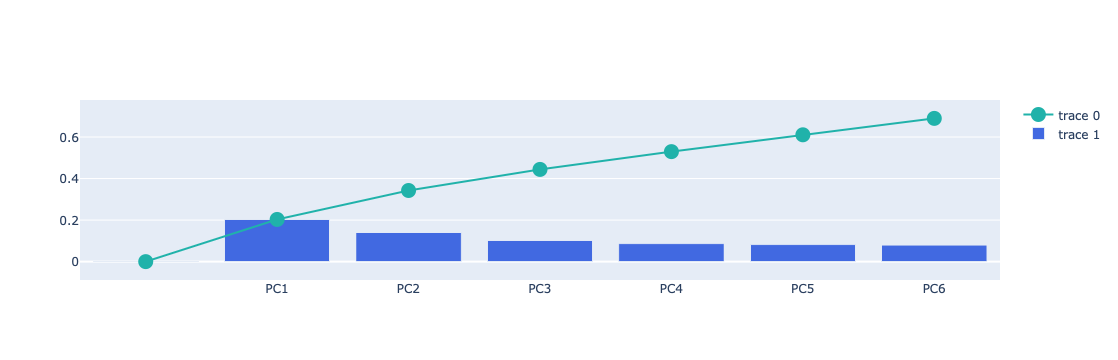

In [44]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=explained_variance_df['PC'],
        y=explained_variance_df['Cumulative Variance'],
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=explained_variance_df['PC'],
        y=explained_variance_df['Explained Variance'],
        marker=dict(color="RoyalBlue")
    ))

fig.show()

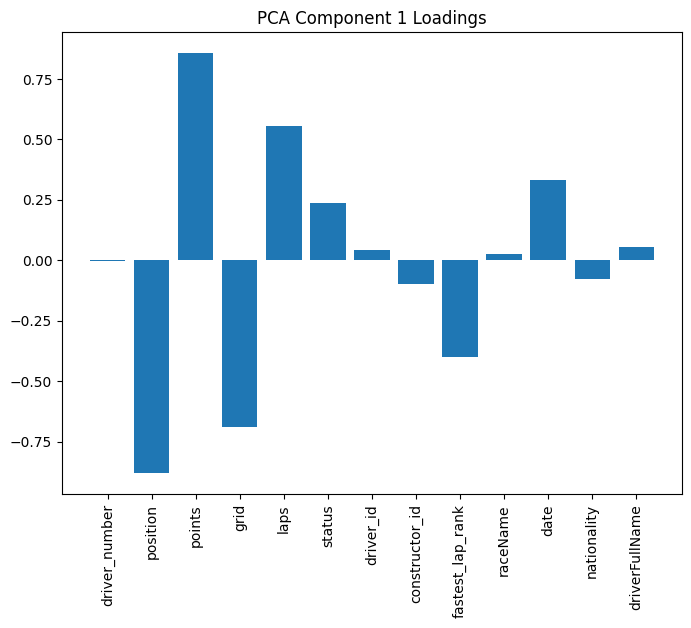

In [45]:

# Assuming X_scaled is your preprocessed and scaled data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(features_scaled)

# Plotting the PCA component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(len(loadings)), loadings[:, 0], align="center")
ax.set_xticks(range(len(loadings)))
ax.set_xticklabels(relevant_features.columns, rotation=90)
ax.set_title('PCA Component 1 Loadings')
plt.show()

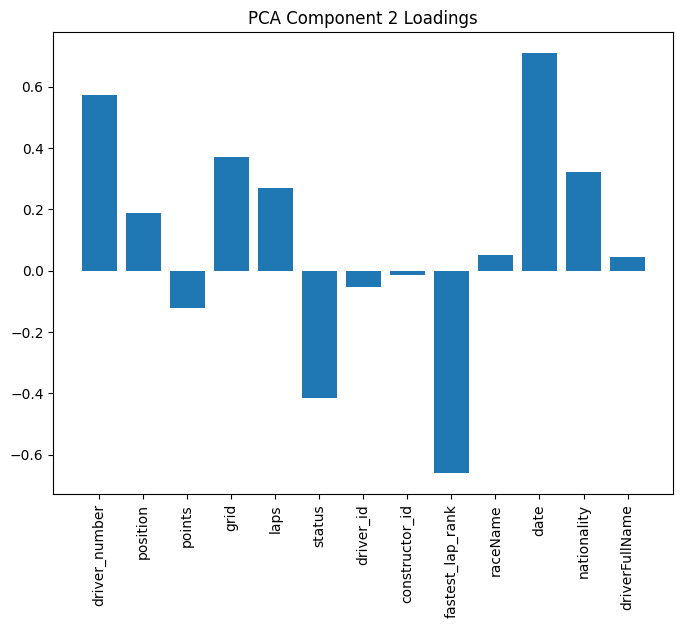

In [46]:
# Plotting the PCA component loadings
loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
fig, ax = plt.subplots(figsize=(8, 6))
ax.bar(range(len(loadings)), loadings[:, 1], align="center")
ax.set_xticks(range(len(loadings)))
ax.set_xticklabels(relevant_features.columns, rotation=90)
ax.set_title('PCA Component 2 Loadings')
plt.show()

In [47]:
# Assuming you've chosen an optimal number of clusters, e.g., 3
kmeans = KMeans(n_clusters=5, random_state=42).fit(X_pca)
labels = kmeans.labels_

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



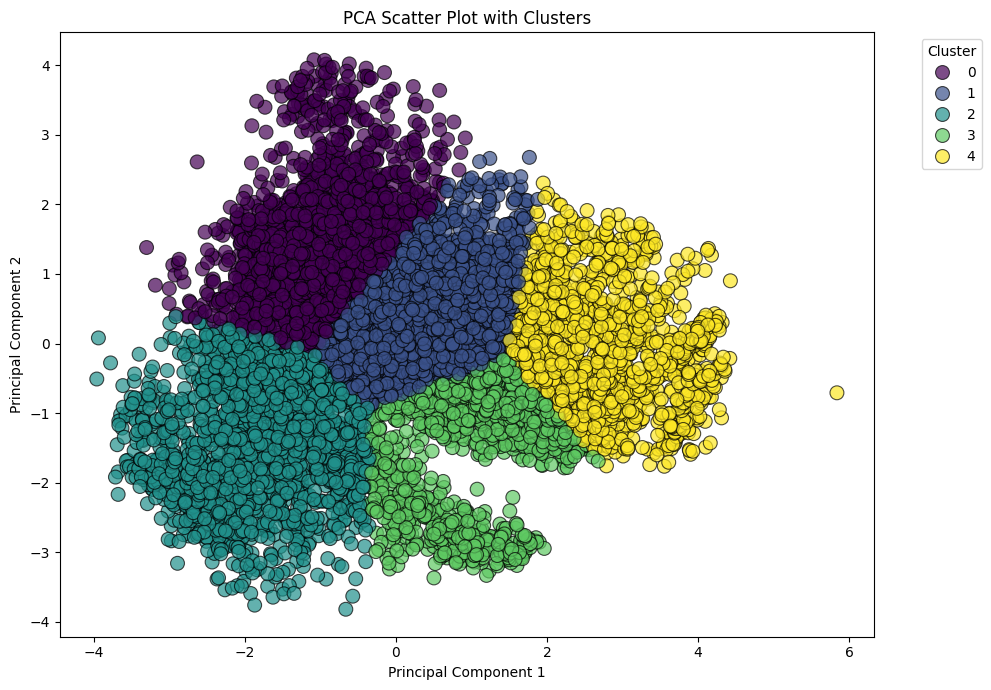

In [48]:
df_pca = pd.DataFrame(X_pca, columns=['Principal Component 1', 'Principal Component 2'])
df_pca['Cluster'] = labels

# Use seaborn to create a scatter plot
plt.figure(figsize=(10, 7))
scatter = sns.scatterplot(data=df_pca, x='Principal Component 1', y='Principal Component 2', hue='Cluster', palette='viridis', s=100, edgecolor='k', alpha=0.7)
scatter.set_title('PCA Scatter Plot with Clusters')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')  # Place the legend outside the plot
plt.tight_layout()  # Adjust the layout
plt.show()